In [5]:
import pandas as pd

from data_pipeline import *
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df_bpi = pd.read_csv('BPI_Challenge_2017.csv')
# Event of interest: what to predict
event_of_interest = "A_Cancelled"  # O_Accepted

# df_bpi= pd.read_csv("BPI_Challenge_2017.csv")
df_bpi.rename(inplace=True, columns={"time:timestamp": "time", "case:concept:name": "case", "concept:name": "event"})
df_bpi["time"] = pd.to_datetime(df_bpi["time"], errors='coerce')

# Running Pipeline
(X_train_pre,
 y_train_pre,
 X_test_pre,
 y_test_pre,
 X_train_post,
 y_train_post,
 X_test_post,
 y_test_post,
 X_train_total,
 y_train_total,
 X_test_total,
 y_test_total) = pipeline(df_bpi, event_of_interest)

Starting pipeline...


Creating prefixes: 100%|██████████| 31509/31509 [01:54<00:00, 275.55it/s]


Computing prefix lengths and case traces...
Checking for A_Cancelled occurrences...


C:\Users\20203666\Documents\GitHub\Advanced_PM_Group14\deliverable_group_14_phase_4\data_pipeline.py:280: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['call time'].fillna(0, inplace=True) #change None values to 0
C:\Users\20203666\Documents\GitHub\Advanced_PM_Group14\deliverable_group_14_phase_4\data_pipeline.py:280: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set

Performing frequency encoding...
Creating final X and Y datasets...
Doing the train-test split...
After filtering train-test split 79.82757496031833% train data and 20.172425039681677% test data
Converted column 'prefix_length' to int8.
Converted column 'event_of_interest_occured' to int8.
Converted column 'A_Create Application_freq' to int8.
Converted column 'A_Submitted_freq' to int8.
Converted column 'W_Handle leads_freq' to int8.
Converted column 'W_Complete application_freq' to int8.
Converted column 'A_Concept_freq' to int8.
Converted column 'A_Accepted_freq' to int8.
Converted column 'O_Create Offer_freq' to int8.
Converted column 'O_Created_freq' to int8.
Converted column 'O_Sent (mail and online)_freq' to int8.
Converted column 'W_Call after offers_freq' to int8.
Converted column 'A_Complete_freq' to int8.
Converted column 'W_Validate application_freq' to int8.
Converted column 'A_Validating_freq' to int8.
Converted column 'O_Returned_freq' to int8.
Converted column 'W_Call in

# Evidence

In [7]:
df_post = X_train_post.join(y_train_post) #Concatenating train data of post events
df_pre = X_train_pre.join(y_train_pre) #Concatenating train data of pre events
df_total = X_train_total.join(y_train_total) #Concatenating train data of total events

## Evidence 4.2.2 Credit Score

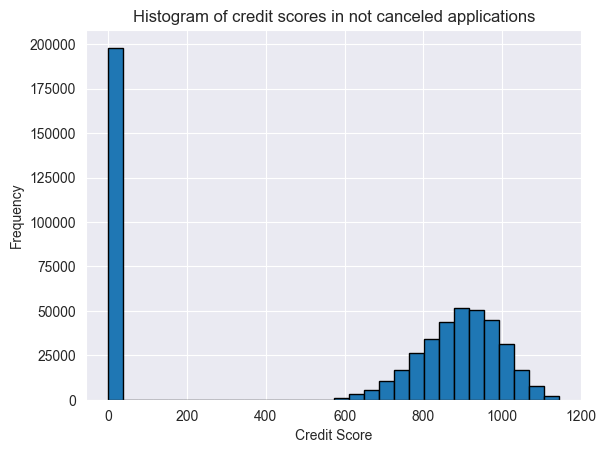

In [8]:
ax = df_post[df_post['event_of_interest_occured'] == 0]['CreditScore'].plot(kind='hist', bins=30, edgecolor='black')
ax.set_title('Histogram of credit scores in not canceled applications')
ax.set_xlabel('Credit Score');

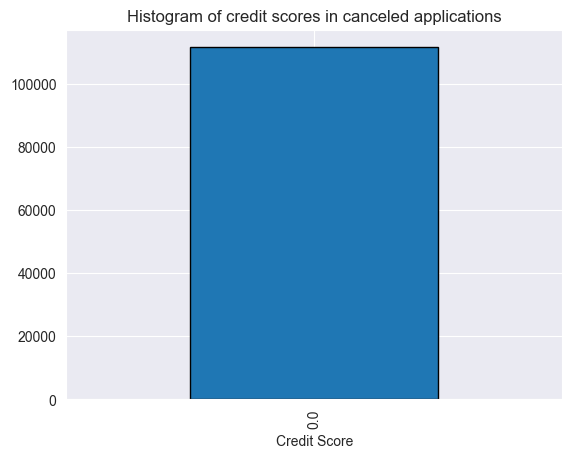

In [9]:
ax = df_post[df_post['event_of_interest_occured'] == 1]['CreditScore'].value_counts().plot(kind='bar', edgecolor='black')
ax.set_title('Histogram of credit scores in canceled applications')
ax.set_xlabel('Credit Score');

In [10]:
#Number of instances where credit score = 0 in non cancelled applications
cs_0 = len(df_post[(df_post['event_of_interest_occured'] == 0) &(df_post['CreditScore']==0)])

In [11]:
#Total number of non cancelled applications
cs_total = len(df_post[df_post['event_of_interest_occured'] == 0])

In [12]:
cs_0/cs_total *100 #Calculate percentage

36.35729367483705

## 4.2.3 Requested Amount

In [13]:
# Mean requested amount for non cancelled applications
df_total[df_total['event_of_interest_occured'] == 0]['case:RequestedAmount'].mean()

np.float64(16235.871877791014)

In [14]:
# Mean requested amount for cancelled applications
df_total[df_total['event_of_interest_occured'] == 1]['case:RequestedAmount'].mean()

np.float64(15627.636532965093)

In [15]:
# Median requested amount for non cancelled applications
df_total[df_total['event_of_interest_occured'] == 0]['case:RequestedAmount'].median()

np.float64(13000.0)

In [16]:
# Median requested amount for cancelled applications
df_total[df_total['event_of_interest_occured'] == 1]['case:RequestedAmount'].median()

np.float64(10000.0)

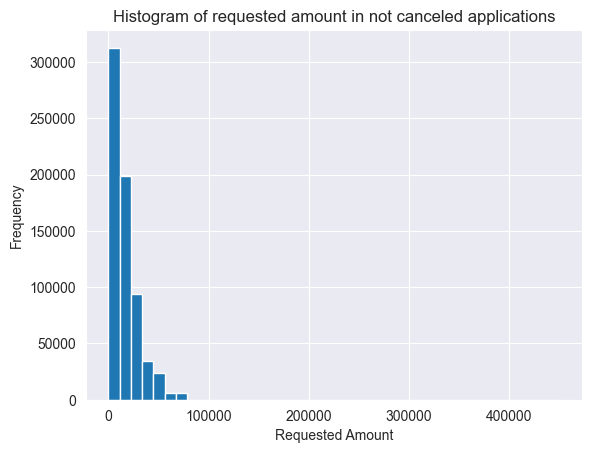

In [17]:
ax = df_total[df_total['event_of_interest_occured'] == 0]['case:RequestedAmount'].plot(kind='hist', bins=40)
ax.set_title('Histogram of requested amount in not canceled applications')
ax.set_xlabel('Requested Amount');

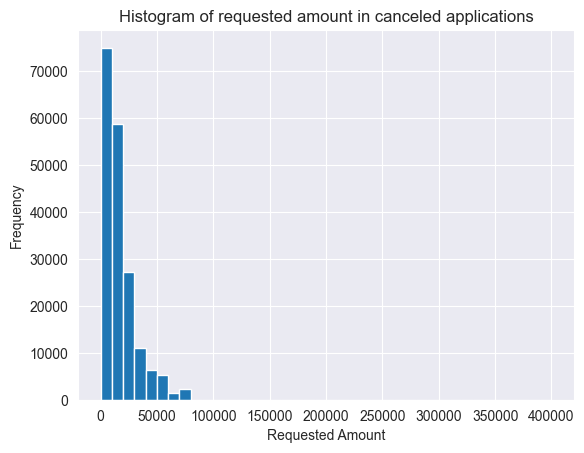

In [18]:
ax = df_total[df_total['event_of_interest_occured'] == 1]['case:RequestedAmount'].plot(kind='hist', bins=40)
ax.set_title('Histogram of requested amount in canceled applications')
ax.set_xlabel('Requested Amount');

In [19]:
df_cancel = df_total[df_total['event_of_interest_occured'] == 1]['case:RequestedAmount'] #Applications that get cancelled
df_notcancel = df_total[df_total['event_of_interest_occured'] == 0]['case:RequestedAmount'] #Applications that not get cancelled

C:\Users\20203666\AppData\Local\Temp\ipykernel_25312\3426597059.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_cancel, shade=True, color='blue', label='Event Occurred (1)')
C:\Users\20203666\AppData\Local\Temp\ipykernel_25312\3426597059.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_notcancel, shade=True, color='red', label='Event Not Occurred (0)')


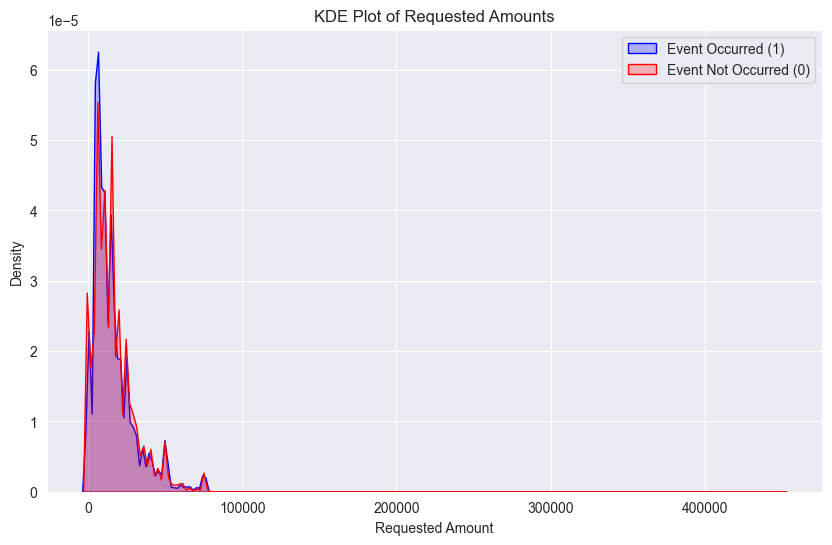

In [20]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_cancel, shade=True, color='blue', label='Event Occurred (1)')
sns.kdeplot(df_notcancel, shade=True, color='red', label='Event Not Occurred (0)')

plt.title('KDE Plot of Requested Amounts')
plt.xlabel('Requested Amount')
plt.ylabel('Density')
plt.legend()
plt.show()

In [21]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test
mw_stat, mw_p_value = mannwhitneyu(df_cancel.dropna(), df_notcancel.dropna(), alternative='two-sided')

print(f"Mann-Whitney U Statistic: {mw_stat}")
print(f"Mann-Whitney U p-value: {mw_p_value}")


Mann-Whitney U Statistic: 60764458316.5
Mann-Whitney U p-value: 5.8259616520789395e-154


## 4.2.4 Total Time and Average Time Features

In [22]:
case_duration = df_bpi.groupby('case')['time'].agg(['min', 'max']) #Aggregate on cases
case_duration['duration'] = case_duration['max'] - case_duration['min'] #Calculate case duration
case_duration['duration_seconds'] = case_duration['duration'].dt.total_seconds()
case_duration = case_duration.reset_index()

df_sorted = df_bpi.sort_values(['case', 'time']) #Sort by case and time

case_events = df_sorted.groupby('case')['event'].apply(list).reset_index() #Group by case and aggregate events
case_summary = pd.merge(case_duration, case_events, on='case') #Merge both dataframes

case_summary['A_Cancelled'] = case_summary['event'].apply(lambda x: x.count('A_Cancelled')) #Check occurence of A_Cancelled
case_summary['case length'] = case_summary['event'].apply(len) #Compute case length
case_summary['time_per_activity'] = case_summary['duration_seconds'] / case_summary['case length'] # Compute time per activity

In [23]:
# Mean trace length not cancelled applications
case_summary[case_summary['A_Cancelled'] == 0]['case length'].mean()

np.float64(44.05152291488756)

In [24]:
# Mean trace length cancelled applications
case_summary[case_summary['A_Cancelled'] == 1]['case length'].mean()

np.float64(26.24379254146295)

In [25]:
# Mean trace time not cancelled applications
case_summary[case_summary['A_Cancelled'] == 0]['duration_seconds'].mean() / 60/60/24

np.float64(17.94648101229604)

In [26]:
# Mean trace time cancelled applications
case_summary[case_summary['A_Cancelled'] == 1]['duration_seconds'].mean() / 60/60/24

np.float64(29.88771409724774)

In [27]:
# Mean time per activity non cancelled applications
case_summary[case_summary['A_Cancelled'] == 0]['time_per_activity'].mean() / 60/60

np.float64(9.918763358387261)

In [28]:
# Mean time per activity non cancelled applications
case_summary[case_summary['A_Cancelled'] == 1]['time_per_activity'].mean() / 60/60

np.float64(29.044735684261028)

## Call Time mentioned in section 'prediction features'

In [29]:
# Mean call time of non cancelled applications
df_total[df_total['event_of_interest_occured'] == 0]['call time'].mean()

np.float64(623.1565556195263)

In [30]:
# Mean call time of cancelled applications
df_total[df_total['event_of_interest_occured'] == 1]['call time'].mean()

np.float64(217.81817396726504)